<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Classificação do 'gênero' de músicas retiradas da API do Spotify usando KNN***
---

In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10389545, Alexandre Henrique Makita Rodrigues' #@param {type:"string"}
Aluno2 = '10387977, Filipe Costa Pereira' #@param {type:"string"}
Aluno3 = '10388924, Guilherme Santos de Oliveira' #@param {type:"string"}
Aluno4 = '10388673, Maisa Folgueral' #@param {type:"string"}
Aluno5 = '10389458, Matheus Farias de Oliveira Matsumoto' #@param {type:"string"}



# **Resumo (*Abstract*)**

O projeto propõe a identificação do gênero de músicas usando a API do Spotify e o algoritmo KNN. Ao analisar características, como por exemplo energia e valência das músicas, o modelo é treinado para distinguir entre os gêneros eletrônico e sertanejo. Ao final da implementação, espera-se que o modelo treinado possua uma acuracidade elevada e, além disso, também garanta a alta precisão de cada classe.

# **Referencial Teórico**
API do Spotify é uma interface de programação de aplicativos que permite acessar uma ampla gama de dados sobre músicas, artistas, álbuns e playlists. Utilizamos essa API para extrair características acústicas das músicas que são usadas como features no modelo de classificação.

**Funcionamento da API do Spotify:**

*   Autenticação: Para acessar a API, é necessário autenticar-se usando o OAuth 2.0.
*   Requisições: Enviamos requisições HTTP para endpoints específicos da API para obter dados de músicas.
*   Resposta: A API retorna dados em formato JSON, que são inseridos em um arquivo .csv e são usados no modelo de machine learning.

**Características Musicais:**

As características musicais extraídas através da API do Spotify incluem:

*   Danceabilidade: Medida de quão adequada uma faixa é para dançar, baseada em uma combinação de elementos musicais.
*   Energia: Uma medida perceptual de intensidade e atividade.
*   Valência: Descreve a positividade musical, como uma faixa soa emocionalmente positiva.
*   Tempo: A velocidade ou ritmo de uma peça musical, medida em batidas por minuto (BPM).
*   Acústica: Uma medida de quão acústica é uma faixa.
*   Speechiness: A presença de palavras faladas na música.
*   Instrumentalness: A medida em que uma faixa não contém vocais.
*   Liveness: A presença de um público na gravação.
*   Loudness: O volume geral da faixa em decibéis (dB).
*   Key: A tonalidade da faixa.
*   Mode: O modo (maior ou menor) da faixa.
*   Duration_ms: A duração da faixa em milissegundos.
*   Time_signature: O compasso da música.

**Dados da Música:**

Os dados das músicais extraídas por meio da API do Spotify são:
*   Artist: Nome do artista ao qual a música pertence.
*   Track: Título da música.
*   Album: Álbum que a música pertence.
*   Id: Identificador da música no Spotify.
*   Release Date: A data de lançamento do álbum da música.
*   Popularity: A popularidade da faixa no Spotify.
*   Genres: Gêneros musicais associados à faixa.

**Artigos relacionados:**

***Song Recommendation System based on Mood Detection using Spotify's Web API:*** O estudo mencionado examina diversos sistemas de recomendação musical existentes — baseados em conteúdo, colaborativos, híbridos e baseados em contexto — e propõe um novo sistema de recomendação baseado em conteúdo. Este novo sistema se destaca ao levar em consideração a emoção atual do usuário, utilizando um vasto banco de dados de músicas. O sistema recomenda músicas com base no histórico de escuta do usuário, utilizando características das músicas extraídas pela API Web do Spotify.

***Song and Artist Attributes Analysis For Spotify:*** O artigo de pesquisa discute a análise das características acústicas de músicas disponíveis no Spotify. Com mais de 70 milhões de músicas oferecidas por gravadoras e empresas de mídia, incluindo aquelas com limitações de direitos digitais, o Spotify fornece um rico banco de dados para análise musical. Utilizando a API Web do Spotify, é possível capturar diversos atributos ou features de cada música, que são essenciais para a criação de modelos de machine learning e para realizar análises estatísticas aprofundadas.

# **Exemplo de Aplicação**

Podemos utilizar os atributos musicais fornecidos pela API do Spotify para treinar o modelo KNN. Depois de treinado, o modelo pode prever o 'gênero' de novas músicas com base na similaridade dos seus atributos com os exemplos de treinamento.

Por exemplo, podemos classificar músicas do gênero eletrônica e sertanejo com base em seus atributos. Deste modo, algoritmos podem usar a classificação para sugerir músicas semelhantes aos usuários com base nas suas preferências de atributos específicos. Além disso, as plataformas podem criar playlists automáticas com base nos atributos das músicas como energia, dançabilidade, entre outros.


# **Implementação**

O código abaixo é utilizado para acessar a API do Spotify e coletar os dados das músicas. Neste caso, há uma lista de artistas dos gêneros sertanejo e eletrônica que fornecemos. Para cada artista, serão coletadas até 50 músicas. Além disso, entre a coleta das músicas de cada artista, há um tempo de espera de 60 segundos.

In [ ]:
import csv
import os
import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


client_id = 'YOUR-CLIENT-ID'
client_secret = 'YOUR-SECRET-ID'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def search_tracks_by_artist(artist_name):
    results = sp.search(q=f'artist:{artist_name}', type='track', limit=50)
    return results['tracks']['items']

def get_track_features(track_id):
    track_features = sp.audio_features(track_id)
    return track_features[0] if track_features else None

def save_to_csv(data, filename):
    current_dir = os.path.dirname(os.path.abspath(__file__))
    filepath = os.path.join(current_dir, filename)
    with open(filepath, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

def main():
    artist_names = [
        'Adam Beyer', 'Archie Hamilton', 'Ben Klock', 'Chris Stussy', 'Dubfire', , 'Joris Voorn',
        'East End Dubs', 'Etapp Kyle', 'Janeret', 'lapix', 'Plastikman', 'Objekt', 'Voiski',
        'Zekk', 'Laurent Garnier', 'Paul Kalkbrenner', 'Boris Brejcha', 'Tale Of Us', 'Maceo Plex',
        'The Black Madonna', 'Marcel Dettmann', 'Len Faki', 'Peggy Gou', 'KiNK', 'Honey Dijon',
        'ANNA', 'Pan-Pot', 'Recondite', 'Stephan Bodzin', 'Nicole Moudaber', 'Alan Fitzpatrick',
        'Dense & Pika', 'I Hate Models', 'DJ Hell', 'Matador', 'Patrick Topping', 'FJAAK', 'Agoria',
        'Gusttavo Lima', 'Jorge & Mateus', 'Zezé Di Camargo & Luciano', 'Chitãozinho & Xororó', 'Luan Santana',
        'Henrique & Juliano', 'Marília Mendonça', 'Maiara & Maraisa', 'Fernando & Sorocaba', 'Bruno & Marrone',
        'Wesley Safadão', 'Lucas Lucco', 'Matheus & Kauan', 'Simone & Simaria', 'Zé Neto & Cristiano',
        'Eduardo Costa', 'Leonardo', 'Victor & Leo', 'Cristiano Araújo', 'Jads & Jadson', 'Thaeme & Thiago',
        'Humberto & Ronaldo', 'João Neto & Frederico', 'Diego & Victor Hugo', 'Guilherme & Santiago',
        'Daniel', 'Chrystian & Ralf', 'Rick & Renner', 'Edson & Hudson', 'Rionegro & Solimões', 'Bruno & Barreto',
        'Munhoz & Mariano', 'Marcos & Belutti', 'Michel Teló', 'Paula Fernandes','João Bosco & Vinícius',
        'Hugo & Guilherme', 'Gino & Geno', 'Felipe Araújo', 'Matogrosso & Mathias'
    ]

    all_track_data = []

    for artist_name in artist_names:
        print(artist_name)

        tracks = search_tracks_by_artist(artist_name)

        for track in tracks:
            track_id = track['id']
            track_title = track['name']
            artist_name = track['artists'][0]['name']
            album_name = track['album']['name']
            release_date = track['album']['release_date']
            popularity = track['popularity']

            artist_id = track['artists'][0]['id']
            artist_info = sp.artist(artist_id)
            genres = ', '.join(artist_info['genres'])

            track_features = get_track_features(track_id)
            if track_features:
                all_track_data.append({
                    'artist': artist_name,
                    'track': track_title,
                    'album': album_name,
                    'release_date': release_date,
                    'popularity': popularity,
                    'genres': genres,
                    'id': track_id,
                    'danceability': track_features['danceability'],
                    'energy': track_features['energy'],
                    'key': track_features['key'],
                    'loudness': track_features['loudness'],
                    'mode': track_features['mode'],
                    'speechiness': track_features['speechiness'],
                    'acousticness': track_features['acousticness'],
                    'instrumentalness': track_features['instrumentalness'],
                    'liveness': track_features['liveness'],
                    'valence': track_features['valence'],
                    'tempo': track_features['tempo'],
                    'duration_ms': track_features['duration_ms'],
                    'time_signature': track_features['time_signature']
                })

                print(track_id)
                print('\n\n')

        time.sleep(60)

    save_to_csv(all_track_data, 'all.csv')

Abaixo, são realizadas as importações das bibliotecas que serão utilizadas:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

A seguir, vamos carregar os dados do nosso dataset:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maisafolgueral/project-ai/main/all.csv')
df.head()

,artist,track,album,release_date,popularity,genres,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Adam Beyer,Desert Queen,Desert Queen,2023-10-20,56,eletronica,3XEGdwonYRQM5sX0I0CsoR,0.630,0.980,11,-5.173,0,0.0518,0.000410,0.415,0.332,0.2070,135.997,236691,4
1,Adam Beyer,Your Mind,Your Mind,2018-06-18,52,eletronica,5NZdurYcFYOg3s2YyzeVgE,0.751,0.721,11,-8.092,0,0.0654,0.000255,0.576,0.120,0.0389,126.019,502969,4
2,Adam Beyer,Space Date - Pleasurekraft Remix,Space Date Remixes,2019-07-08,46,eletronica,6Z7g4cGUd0qpAdaY1jadz4,0.723,0.822,10,-9.421,0,0.0452,0.000607,0.789,0.112,0.0628,127.008,549051,4
3,Adam Beyer,Let's Begin,Let's Begin,2024-02-02,47,eletronica,008Q1wg8oH594VO9XkolM8,0.676,0.972,2,-4.785,1,0.0477,0.000655,0.711,0.101,0.1370,136.000,250147,4
4,Adam Beyer,Simulator,Simulator,2023-04-21,43,eletronica,4VosqOFgprZKZz3EeDOdMA,0.680,0.914,2,-5.369,1,0.1410,0.038500,0.806,0.386,0.1360,133.029,220376,4


Aqui, vamos verificar as dimensões do nosso conjunto de dados:

In [ ]:
df.shape

(3431, 20)

Também contamos a quantidade de ocorrências para cada valor da nossa variável objetivo:

In [ ]:
df['genres'].value_counts()

genres
eletronica    1850
sertanejo     1581
Name: count, dtype: int64

Em seguida, eliminamos os dados ausentes em nosso dataset:

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 3431
After 3429


Nesta célula, definimos as variáveis preditoras (consideramos somente aquelas que fazem sentido para o nosso propósito) e a variável objetivo:

In [ ]:
predictors = ['energy', 'key', 'loudness', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
target = 'genres'

X = df[predictors]
y = df[target]

Precisamos normalizar os dados. Para isto, vamos utilizar o Standard Scaler:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Abaixo, separamos os nossos conjuntos de treinamento e teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

Vamos testar o algoritmo KNN para diversos valores de k:

In [ ]:
for k in range(1,21):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'k={k} - acc:{accuracy:.2f}\n')

k=1 - acc:0.93

k=2 - acc:0.93

k=3 - acc:0.93

k=4 - acc:0.93

k=5 - acc:0.94

k=6 - acc:0.93

k=7 - acc:0.93

k=8 - acc:0.93

k=9 - acc:0.93

k=10 - acc:0.94

k=11 - acc:0.93

k=12 - acc:0.94

k=13 - acc:0.93

k=14 - acc:0.93

k=15 - acc:0.93

k=16 - acc:0.94

k=17 - acc:0.94

k=18 - acc:0.94

k=19 - acc:0.94

k=20 - acc:0.94



Na célula abaixo, treinamos o nosso modelo utilizando o KNN, considerando 5 vizinhos mais próximos (o melhor valor de k que encontramos nos testes acima):

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Vamos avaliar o resultado do nosso treinamento, com o classification report:

In [ ]:
print('\nKNN Classification Report:\n')
print(classification_report(y_test, y_pred))


KNN Classification Report:

              precision    recall  f1-score   support

  eletronica       0.97      0.91      0.94       564
   sertanejo       0.90      0.96      0.93       465

    accuracy                           0.94      1029
   macro avg       0.93      0.94      0.94      1029
weighted avg       0.94      0.94      0.94      1029



Abaixo, podemos visualizar um gráfico com a matriz de confusão do modelo treinado:

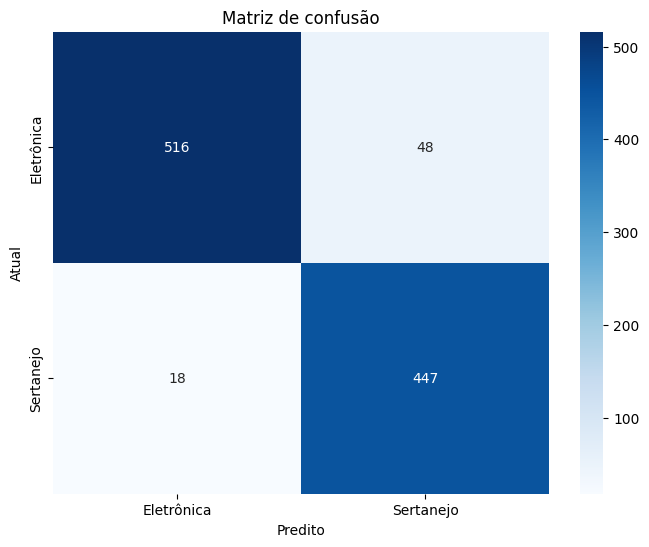

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Eletrônica', 'Sertanejo'], yticklabels=['Eletrônica', 'Sertanejo'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de confusão')
plt.show()

No gráfico abaixo, pode-se visualizar a importância de cada variável em nosso treinamento:

<ipython-input-374-0f593b2a48fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(predictors)[indices], palette='viridis')


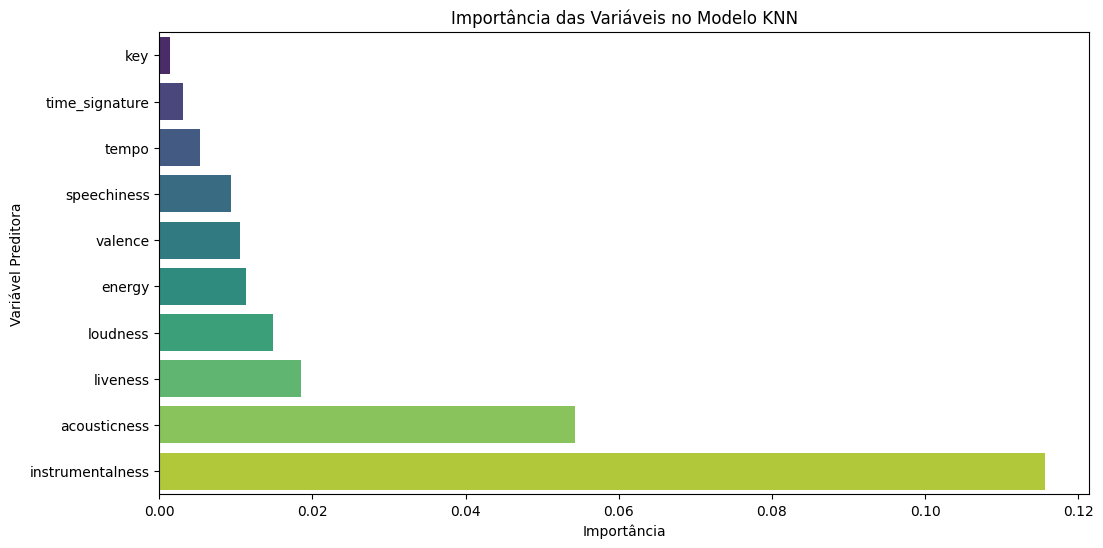

In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2)

importances = result.importances_mean
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=np.array(predictors)[indices], palette='viridis')
plt.xlabel('Importância')
plt.ylabel('Variável Preditora')
plt.title('Importância das Variáveis no Modelo KNN')
plt.show()

# **Uma ideia de Projeto de Aplicação**

Uma ideia de projeto de aplicação é desenvolver um sistema de recomendação de músicas baseado na classificação de gênero utilizando KNN e a API do Spotify. Deste modo, o projeto começa pela coleta de dados, onde a API do Spotify será utilizada para obter informações detalhadas sobre músicas, como nome, artista, gênero e características acústicas. Em seguida, o algoritmo KNN será utilizado para classificar o gênero das músicas com base nas suas características acústicas, realizando o treinamento e a validação do modelo com dados rotulados. Assim, será possível avançar para um sistema de recomendação o qual será composto por várias funcionalidades, permitindo que os usuários criem perfis e salvem as músicas favoritas. Com isso, será realizada a análise do histórico de escuta dos usuários para entender suas preferências e, com base nisso, serão recomendadas músicas que correspondam ao gênero preferido e à similaridade das características acústicas com as músicas já ouvidas.


# **Referências**

A. Bhowmick, K. Shamkuwar, J. D. Dorathi Jayaseeli and D. Malathi, "Song Recommendation System based on Mood Detection using Spotify's Web API," 2022 International Interdisciplinary Humanitarian Conference for Sustainability (IIHC), Bengaluru, India, 2022, pp. 581-585, doi: 10.1109/IIHC55949.2022.10060806. keywords: {Emotion recognition;Databases;Mood;Music;Collaboration;History;Sustainable development;content-based;clustering;K-Means;spotipy;Web API;CNN;OpenCV;Viola-Jones;emotion detection},

A. Sandra Grace, "Song and Artist Attributes Analysis For Spotify," 2022 International Conference on Engineering and Emerging Technologies (ICEET), Kuala Lumpur, Malaysia, 2022, pp. 1-6, doi: 10.1109/ICEET56468.2022.10007360. keywords: {Deep learning;Data analysis;Terminology;Data visualization;Companies;Metadata;Media;Spotify;Spotify Web API;Attributes;Machine learning;Data visualization;Audio Features},

K. Allawadi and C. Vij, "A Smart Spotify Assistance and Recommendation System," 2023 International Conference on Advancement in Computation & Computer Technologies (InCACCT), Gharuan, India, 2023, pp. 286-291, doi: 10.1109/InCACCT57535.2023.10141810. keywords: {Correlation;Codes;Music;Entertainment industry;Libraries;Dynamical systems;Recommender systems;Spotify;Recommendation;Song Features;Spotify Web API;Spotipy.},

# **Vídeo e GitHub**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e na solução empregada. Salve em um GitHub público seu projeto (o notebook Python).

Link para o vídeo: https://youtu.be/82bwpZ6OyRw

# **Conclusão**

Em conclusão, este projeto demonstrou a eficácia do algoritmo KNN para a classificação de gêneros musicais, destacando os estilos eletrônico e sertanejo. Com a integração da API do Spotify, obtivemos uma acuracidade impressionante de 94% na classificação das músicas. Além disso, destaca-se a alta precisão de ambas as classes, o que pôde ser observado no gráfico da matriz de confusão. Assim, os resultados refletem não apenas a robustez do modelo implementado, mas também a qualidade dos dados fornecidos pela API do Spotify.



# **Apêndice**

Link da Apresentação no YouTube:


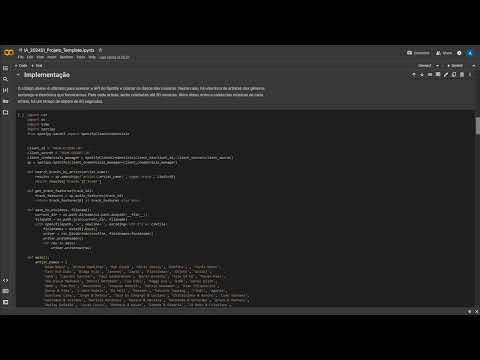

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('82bwpZ6OyRw')

---

In [ ]:
#@title **Avaliação**
Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 10 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 10 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,tia,nome,nota
0,10389545,ALEXANDRE MAKITA,10.0
1,10387977,FILIPE COSTA PEREIRA,10.0
2,10388924,GUILHERME SANTOS DE OLIVEIRA,10.0
3,10388673,MAISA FOLGUERAL,10.0
4,10389458,MATHEUS FARIAS DE OLIVEIRA MATSUMOTO,10.0
